# Face-Recognition 
A face detector using Deep Learning with OpenCV 

### NOTE: You can skip this step 

### 1. Register face
Below steps are performed to collect the face samples of a person and save it in the database.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#import required libraries
import cv2
import sys , os
import numpy as np
##############################################
#setting up the dataset files
# It captures images and stores them in datasets  
# folder under the folder name of sub_dir 
haar_file = 'haarcascade_frontalface_default.xml'
# All the faces data will be 
#  present this folder 
train = 'datasets/train'  
validation='datasets/validation'
###############################################
# These are sub data sets of folder,  
# for my faces I've used my name you can  
# change the label here 
sub_dir = input('Enter Name to Register Face: ')
###############################################
# setting path for storing the images in train and test set
dataset='dataset'
train = 'dataset/train'  
validation='dataset/validation'

if not os.path.isdir(dataset): 
    os.mkdir(dataset) 

if not os.path.isdir(train): 
    os.mkdir(train) 

if not os.path.isdir(validation): 
    os.mkdir(validation) 

path1 = os.path.join(train, sub_dir) 
path2=os.path.join(validation, sub_dir) 
if not os.path.isdir(path1): 
    os.mkdir(path1) 
if not os.path.isdir(path2): 
    os.mkdir(path2) 
#################################################
# defining the size of images  
(width, height) = (400, 400)  
#################################################
#'0' is used for my webcam,  
# if you've any other camera 
#  attached use '1' like this 
face_cascade = cv2.CascadeClassifier(haar_file) 
webcam = cv2.VideoCapture(0) 
#################################################
# this function is created in order to avoid overwriting of images
# by keeping the count of the files already in the mentioned directory
def get_max(l):
    number = []
    for word in l:
        temp = ''
        for letter in word:
            if letter != '.':
                temp += letter
            else:
                break
        number.append(int(temp))

    return max(number)
#####################################################
# The program loops until it has 50 images of the face. 
path='dataset/train/'+sub_dir
if os.listdir(path):
    count = get_max(os.listdir(path))
else:
    count = 0

num_img = count + 50

split=0.8
mid=num_img//2
split_train=split*num_img
split_test=(1-split)*num_img

count = 1
while count < num_img:  
    (_, im) = webcam.read() 
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) 
    faces = face_cascade.detectMultiScale(gray, 1.3, 4) 
    for (x, y, w, h) in faces: 
        cv2.rectangle(im, (x, y), (x + w+20, y + h+20), (0, 0, 0), 2) 
        face = gray[y:y + h, x:x + w] 
        face_resize = cv2.resize(face, (width, height)) 
    
        if count>mid and count <mid+split_test:
            cv2.imwrite('% s/% s.jpg' % (path2, count), face_resize)
        else:
            cv2.imwrite('% s/% s.jpg' % (path1, count), face_resize) 
    
        
        
      #  cv2.imwrite('% s/% s.jpg' % (path, count), face_resize) 
    count += 1
      
    cv2.imshow('OpenCV', im) 
    key = cv2.waitKey(10) 
    if key == 27: 
        break
webcam.release()
cv2.destroyAllWindows()      
print("Collecting Samples Complete")
#######################################################

______________________________________

### 2. Train on pretrained models 

dataset at:  /content/drive/My Drive/Face-Recognition/dataset

In [1]:
from keras.layers import Lambda, Input, Flatten, Dense
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [7]:
# resize all images
image_size = [200,200]

# path to train and test folders

# FOR COLAB

# train_path = '/content/drive/My Drive/Face-Recognition/dataset/train'
# val_path = '/content/drive/My Drive/Face-Recognition/dataset/validation'

#FOR LOCAL

train_path = 'dataset/train'
val_path = 'dataset/validation'


In [3]:
# add preprocessing layer to the from of VGG
vgg = VGG16(
    input_shape = image_size + [3],
    weights = 'imagenet',
    include_top = False)

# freezing the above layers
for layer in vgg.layers:
  layer.trainable = False

58892288/58889256 [==============================] - 109s 2us/step


In [8]:
# useful for getting number of classes
dirs = glob('dataset/train/*')
print('Classes: ' + str(len(dirs)))

Classes: 5


In [10]:
# Adding layers
x = Flatten()(vgg.output)
prediction = Dense(len(dirs), activation = 'softmax')(x)

In [11]:
model = Model(inputs = vgg.input, output = prediction)

/home/theorangeguy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [12]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0   

In [13]:
# build the model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [14]:
# Setting up the Datagenrators

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale=1/255)

training_set = train_datagen.flow_from_directory(
    train_path,
    target_size = (200,200),
    batch_size = 32,
    class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(
    val_path,
    target_size = (200,200),
    batch_size = 32,
    class_mode = 'categorical')

Found 369 images belonging to 5 classes.
Found 134 images belonging to 5 classes.


In [15]:
# Training the model 
history = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 5,
)

Epoch 1/5
12/12 [==============================] - 164s 14s/step - loss: 0.8719 - accuracy: 0.7534 - val_loss: 0.1315 - val_accuracy: 0.9851
Epoch 2/5
12/12 [==============================] - 126s 11s/step - loss: 0.1534 - accuracy: 0.9675 - val_loss: 0.0569 - val_accuracy: 0.9776
Epoch 3/5
12/12 [==============================] - 127s 11s/step - loss: 0.0602 - accuracy: 0.9864 - val_loss: 0.0182 - val_accuracy: 0.9925
Epoch 4/5
12/12 [==============================] - 125s 10s/step - loss: 0.0359 - accuracy: 0.9864 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 5/5
12/12 [==============================] - 127s 11s/step - loss: 0.0270 - accuracy: 0.9919 - val_loss: 0.0219 - val_accuracy: 0.9925


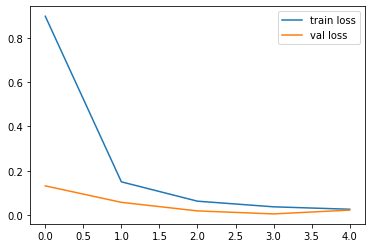

In [16]:
# Viewing the loss and accuracy

plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()

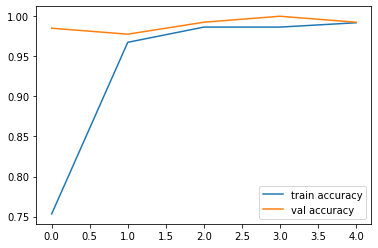

In [17]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()

In [18]:
model.save('vgg_model_1.h5')

In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

 
  plt.imshow(img)

  plt.show()

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

  
  if classes[0][1]==1:
    print('mohan')
  elif classes[0][1]==1:
    print('jyots ')
  

ModuleNotFoundError: No module named 'google.colab'